### Homework №5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import time
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.lines as lines

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


____________________________________________________________________________________________

In [3]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

rng.current = 1

In [4]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
    
rng_bad.current = 1

In [5]:
samples = [rng() for _ in range(1000)]

____________________________________________________________________________________________

#### №1 
Поделим квадрат [0,1]*[0,1] на 10 частей и проверим хи-квадрат


In [6]:
k = 25
side = int(k**0.5)
step = 0

pointX = samples[::2]
pointY = samples[1::2]

x_ticks = np.linspace(0, 1, side + 1)

massiveCountsInSquare = np.zeros(k, dtype = int)
count = 0

for i in range(side):
    for j in range(side):
        count = 0

        for l in range(len(pointX)):
            if((x_ticks[i] <= pointX[l] <= x_ticks[i + 1]) and (x_ticks[j] <= pointY[l] <= x_ticks[j + 1])):
                count += 1
        
        massiveCountsInSquare[step] = count
        step += 1
        


f_exp = np.full(k, len(samples) // (2*k))
massiveCountsInSquare, f_exp, stats.chisquare(massiveCountsInSquare, f_exp)


(array([28, 13, 23, 20, 15, 18, 20, 23, 19, 23, 20, 13, 17, 21, 14, 17, 22,
        27, 16, 17, 22, 20, 23, 21, 28]),
 array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
        20, 20, 20, 20, 20, 20, 20, 20]),
 Power_divergenceResult(statistic=21.5, pvalue=0.6090827152142755))

### №2 
Будем считать количество порядков(те числа в одной серии в каком то отношении порядка)

1 - следующий меньше текущего 

0 - иначе

In [7]:
n = 1000
d = 200                              # рабили на d строк

newmassive = np.zeros(len(samples) - d)
j = 0

for i in range(0, n - 1):
    if(i % (n // d) == 0):
        continue

    if(samples[i] < samples[i + 1]):
        newmassive[j] = 0
    else:
        newmassive[j] = 1
    j += 1

newmassive = newmassive.reshape(d, -1)

f_obs = np.unique(newmassive, return_counts = True , axis = 0)[1]
f_exp = np.full(len(f_obs), n // np.math.factorial(n // d))

f_exp, f_obs, n // np.math.factorial(n // d)
f_obs, f_exp, stats.chisquare(f_obs, (np.sum(f_obs)/np.sum(f_exp))*f_exp)

(array([ 2,  5, 10,  7, 14, 28, 20,  5, 10, 16, 29, 17, 10, 20,  7]),
 array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]),
 Power_divergenceResult(statistic=71.35, pvalue=1.0980722871413188e-09))

### №3
Подберем статистический тест

In [8]:
checkNorm = [rng() for _ in range(1000)]
checkBad = [rng_bad() for _ in range(30000)]

In [9]:
stats.kstest(checkBad, stats.uniform.cdf)

KstestResult(statistic=0.008437018050998446, pvalue=0.027777953265237354)

In [10]:
stats.kstest(checkNorm, stats.uniform.cdf)

KstestResult(statistic=0.029513963367789997, pvalue=0.3417453517955097)

### №4
Для начала нормируем веса для алгоритмы. Далее используем кумулятивная, чтобы создать функцию распределения по такой выборке.


In [11]:
def newDistribution(lenSample, distrib):
    resultOfproc = np.zeros(lenSample, dtype=int)
    for i in range(lenSample):
        elem = np.random.rand()
        j = 0
        while(elem >= distrib[j]):
            resultOfproc[i] += 1
            j += 1
    
    return resultOfproc
        
    

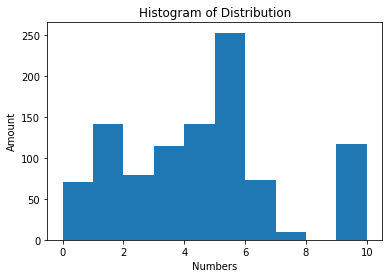

In [12]:
n = 1000
massiveWeights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
massiveWeights /= np.sum(massiveWeights)
F = np.cumsum(massiveWeights, dtype=np.double)

# __________
start_time_1 = time.time()

result = newDistribution(n, F)

end_time_1 = time.time() - start_time_1
# __________

plt.hist(result, range=(0, 10)) 
plt.xlabel('Numbers')
plt.ylabel('Amount')
plt.title('Histogram of Distribution')
plt.show()


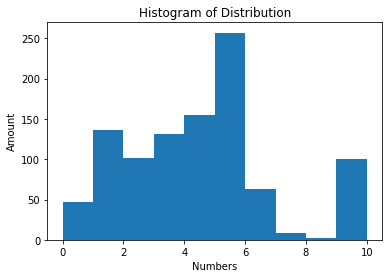

In [13]:
massiveWeights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
massiveWeights /= np.sum(massiveWeights)
getIndex = np.argsort(massiveWeights)
massiveWeights = np.sort(massiveWeights)
F = np.cumsum(massiveWeights, dtype=np.double)

# __________
start_time_2 = time.time()

result = newDistribution(n, F)

end_time_2 = time.time() - start_time_2
# __________

plt.hist(getIndex[result], range=(0, 10)) 
plt.xlabel('Numbers')
plt.ylabel('Amount')
plt.title('Histogram of Distribution')
plt.show()


In [14]:
print("Ускорили в ")
print(end_time_2 / end_time_1)

Ускорили в 
1.0979567307692308


### №5 
Воспользуемся видом Exp(l) распределения и найдем его обратную, после подставим значения случ вел в найденную формулу. Возьмем параметр l = 1

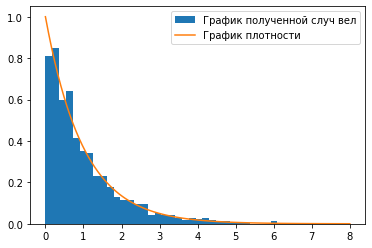

In [15]:
l = 1
randomVector = np.random.rand(1000)
reversDistrib = (-np.log(1 - randomVector)) / l

plt.hist(reversDistrib, 40, density=True,  label="График полученной случ вел")

X = np.linspace(0, 8, 100)
plt.plot(X, l*np.exp(-l*X), label="График плотности")

plt.legend()
plt.show()


### №6 


In [16]:
def to_dist(x):
    return np.exp(x) * np.cos(x)**2

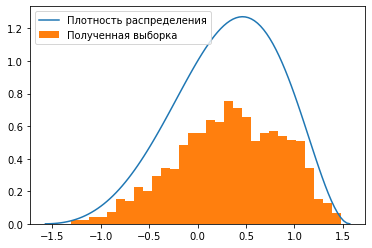

In [17]:
n = 1000
i = 0
left, right = -np.pi/2, np.pi/2
getDistrib = np.zeros(n)

X = np.linspace(left, right, 100)
density = to_dist(X)

while(i < n):
    point_x = np.random.rand()*(right - left) + left    # нормировали для отрезка
    value_x = to_dist(point_x)                          # получили значение плотности в точке
    point_y = np.random.rand()
    if(point_y <= value_x):
        getDistrib[i] = point_x
        i += 1

plt.plot(X, density, label = "Плотность распределения")
plt.hist(getDistrib, 30, density = True, label = "Полученная выборка")

plt.legend()
plt.show()

### №7
Будем использовать векторные опрерации, чтобы расположить удобно точки

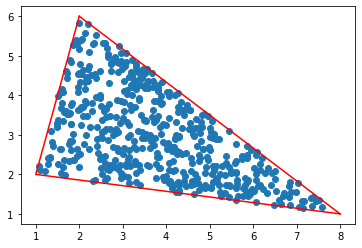

In [18]:
n = 500
i = 0
samples = np.zeros((n, 2), dtype=float)
A = np.array([1,2])
B = np.array([8,1])
C = np.array([2,6])
AB = B - A
AC = C - A

while i < 500:
    point = np.random.rand(2)
    if(np.sum(point) <= 1):
        samples[i] = A + AB*point[0] + AC*point[1]
        i += 1

fig, ax = plt.subplots()

line_1 = lines.Line2D([1,8], [2,1], color="red")
line_2 = lines.Line2D([8,2], [1,6], color="red")
line_3 = lines.Line2D([2,1], [6,2], color="red")
ax.add_line(line_1)
ax.add_line(line_2)
ax.add_line(line_3)

ax.scatter(samples[:, 0], samples[:, 1])
plt.show()


### №8 
Будем генерировать случайный радиус и случайный угол поворота. Далее, отрисуем в полярах 
Случайный радиус будем генерировать, как сумму двух случ величин, тк уже равномерное на [0,2], что является диаметром круга

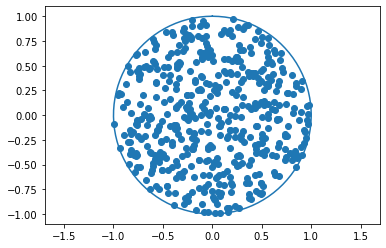

In [19]:
n = 500
i = 0
samples = np.zeros((n, 2), dtype=float)

while (i < n):
    phi = 2 * np.pi * np.random.rand()
    r = np.sqrt(np.random.rand())
    if(r <= 1):
        samples[i][0] = r*np.cos(phi)
        samples[i][1] = r*np.sin(phi)
        i += 1


plt.scatter(samples[:, 0], samples[:, 1])

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

### №9


In [20]:
def makeCorrectSample(a):
    mainMassive = a[a > 1]
    for i in range(len(mainMassive)):
        while True:
            x, y = np.random.rand(2)*2 - 1
            s = x**2 + y**2
            if(s > 1):
                mainMassive[i] = s
                break

    a[a > 1] = mainMassive
    return a


/var/folders/wz/232j026962v2bjt1yb03pv6r0000gn/T/ipykernel_3163/9314820.py:9: RuntimeWarning: invalid value encountered in sqrt
  x = u1 * np.sqrt(- 2 * np.log(s)/s)
/var/folders/wz/232j026962v2bjt1yb03pv6r0000gn/T/ipykernel_3163/9314820.py:10: RuntimeWarning: invalid value encountered in sqrt
  y = u2 * np.sqrt(- 2 * np.log(s)/s)


ValueError: autodetected range of [nan, nan] is not finite

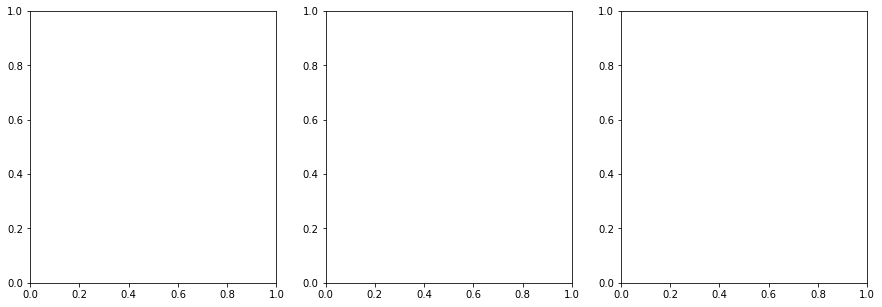

In [21]:
%matplotlib inline

n = 1000
u1, u2 = np.random.rand(2, n)*2 - 1
s = u1**2 + u2**2
s = makeCorrectSample(s)

# r = np.sqrt(-2 * np.log(s)/s)
x = u1 * np.sqrt(- 2 * np.log(s)/s)
y = u2 * np.sqrt(- 2 * np.log(s)/s)

x1 = (-2) * x + 4 * y + 4
x2 = x * 6 + 2 * y + 7

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(x1, x2, bins=30)
ax[0].axis('equal')
ax[1].hist(x1, bins=30)
ax[2].hist(x2, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x1")
ax[2].set_title("Histogram of x2")
plt.show()
print(np.cov(x1, x2))